<a href="https://colab.research.google.com/github/Xavieroc93/BOOTCAMP/blob/main/CHALLENGER_1_BOOTCAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenger 1 Bootcamp**

1. Configuraciòn del *ambiente*

In [ ]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.11
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.22.4
------
Name: matplotlib
Version: 3.7.1


In [ ]:
## importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
from bs4 import BeautifulSoup
import requests   # libreria para los llamados de informaciòn
import yfinance as yf
msft = yf.Ticker("MSFT")
from urllib.request import urlopen

In [ ]:
pip install --upgrade requests beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.30.0 which is incompatible.


##**2**. Obtención de *datos*

Crea una funcion importar_base_bitcoin()

In [107]:
# Función para importar la base de datos de Bitcoin
def importar_base_bitcoin():
#se utiliza la palabra clave global para indicar que la variable df_bitcoin es una variable global y no local a la función.
#El uso de global es necesario en este caso porque, dentro de la función, se asignará un valor a la variable df_bitcoin, y queremos que ese valor asignado esté disponible fuera de la función, es decir, en el ámbito global.
    global df_bitcoin
    # Crea un objeto ticker para Bitcoin
    df = yf.Ticker("BTC-USD")
    # Obtiene el historial de precios de los últimos 7 días en intervalos de 5 minutos
    btc_history = df.history(period="7d", interval="5m")
    # Guarda el historial de precios en el dataframe df_bitcoin
    df_bitcoin = pd.DataFrame(btc_history)
    return df_bitcoin


In [ ]:
df= importar_base_bitcoin()
df.to_excel('bitcoin1.xlsx', index=False)

In [ ]:
# extraer contenido archivo html
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36 Edg/113.0.1774.50'}
url = 'https://coinmarketcap.com/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
soup

Crea una funcion extraer_tendencias()

In [108]:
# Función para extraer las tendencias de precio del Bitcoin
def extraer_tendencias():
  global precio_actual,variacion_1h,tendencia
  
  # Realiza Web Scraping de CoinMarketCap para obtener el precio actual y la variación en la última hora
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36 Edg/113.0.1774.50'}
  url = "https://coinmarketcap.com/"
  respuesta = requests.get(url,headers = headers)
  s=BeautifulSoup(respuesta.content,features="lxml")

 #Encuentra el elemento que contiene el precio actual del Bitcoin y extrae el precio actual y lo convierte a float
  precio_actual = float(soup.find('a', {'href':"/currencies/bitcoin/markets/"}).find('span').getText().replace("$","").replace(",",""))
  #extrae variacion del bitcoin de la ultima hora y se remplaza el % 
  variacion_1h = float(soup.find('span', {'class':'sc-97d6d2ca-0 bQjSqS'}).getText().replace("%",""))
  tendencia = str(soup.find('span', {'class':'sc-97d6d2ca-0 bQjSqS'}))
 #Esto extrae los caracteres de la posición 59 a la 63 del texto de la tendencia, de esta manera captamos el texto 'down'  
  tendencia=tendencia[59:63] 
  if tendencia == 'down':
    tendencia='baja'
  else:
    tendencia='alta'
  return[precio_actual,variacion_1h,tendencia] 

extraer_tendencias() 



[26717.26, 0.69, 'baja']

##**3.Limpieza de Datos**

In [ ]:
df=importar_base_bitcoin()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-05-15 00:00:00+00:00,26931.384766,26940.218750,26927.855469,26939.564453,0,0.0,0.0
2023-05-15 00:05:00+00:00,26942.525391,26942.525391,26920.029297,26920.029297,0,0.0,0.0
2023-05-15 00:10:00+00:00,26918.232422,26935.404297,26914.136719,26935.404297,0,0.0,0.0
2023-05-15 00:15:00+00:00,26919.871094,26919.871094,26811.279297,26812.771484,90236928,0.0,0.0
2023-05-15 00:20:00+00:00,26818.732422,26837.500000,26808.048828,26834.156250,38383616,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-21 21:15:00+00:00,26779.957031,26779.957031,26743.621094,26752.316406,29152256,0.0,0.0
2023-05-21 21:20:00+00:00,26759.111328,26759.111328,26708.882812,26708.882812,44395008,0.0,0.0
2023-05-21 21:25:00+00:00,26706.921875,26749.031250,26706.921875,26749.031250,28924928,0.0,0.0


In [ ]:
## identificar si existe valores con NULL
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1622 entries, 2023-05-15 00:00:00+00:00 to 2023-05-21 21:20:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1622 non-null   float64
 1   High          1622 non-null   float64
 2   Low           1622 non-null   float64
 3   Close         1622 non-null   float64
 4   Volume        1622 non-null   int64  
 5   Dividends     1622 non-null   float64
 6   Stock Splits  1622 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 101.4 KB


In [113]:
#Definimos la función con la cual limpiaremos los datos.
def limpieza_datos():
  global df_base_limpia

  df = importar_base_bitcoin()
  # se copia el df para poder limipiar los datos
  df_base_limpia = df.copy()

  #Eliminar los valores duplicados en el índice
  indices_unicos = df_base_limpia.index.drop_duplicates()
  df_base_limpia = df_base_limpia.reindex(indices_unicos)

  #Eliminar los valores nulos,parámetro how para controlar cómo se manejan los valores nulos en el dataframe, es este caso toda la fila que contenga nulls
  df_base_limpia.dropna(how='all', inplace = True)

  #Mantener únicamente los registros que tengan un Volume > 0
  df_base_limpia = df_base_limpia[df_base_limpia ['Volume'] > 0]

  #Eliminar outliers en el precio del Bitcoin
  close = df_base_limpia['Close']
  Q1 = close.quantile(.25)
  Q3 = close.quantile(.75)
  IIQ = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IIQ
  limite_superior = Q3 + 1.5 * IIQ
  seleccion = ((close >= Q1) & (close < Q3))
  df_base_limpia = df_base_limpia[seleccion]

  return [df_base_limpia, Q1, Q3]

  media_bitcoin =df_base_limpia['Close'].mean()


In [ ]:
limpieza_datos()

[                                   Open          High           Low  \
 Datetime                                                              
 2023-05-15 01:25:00+00:00  27014.630859  27078.990234  27010.048828   
 2023-05-15 01:30:00+00:00  27003.324219  27051.326172  27003.324219   
 2023-05-15 01:35:00+00:00  27070.365234  27170.148438  27070.365234   
 2023-05-15 01:40:00+00:00  27181.623047  27181.623047  27130.759766   
 2023-05-15 01:45:00+00:00  27142.683594  27162.771484  27125.705078   
 ...                                 ...           ...           ...   
 2023-05-21 19:35:00+00:00  26893.628906  26908.238281  26893.628906   
 2023-05-21 19:45:00+00:00  26903.910156  26923.388672  26903.105469   
 2023-05-21 19:50:00+00:00  26910.933594  26912.082031  26900.472656   
 2023-05-21 20:05:00+00:00  26908.142578  26916.285156  26908.142578   
 2023-05-21 20:10:00+00:00  26911.251953  26915.138672  26906.017578   
 
                                   Close     Volume  Dividends

In [ ]:
  # Calcular el precio promedio (Close) de la selección
media_bitcoin =df_base_limpia['Close'].mean()
media_bitcoin


27088.078327315736

### **4. Tomar decisiones**

In [120]:

def tomar_decisiones():
  global df_bitcoin, precio_actual, algoritmo_decision, df_base_limpia,media_bitcoin


  #Determinamos los criterios

  #Si el precio actual del Bitcoin es mayor o igual que la media y la tendencia es baja, se asigna el valor 'Vender' a la variable global algoritmo_decision.
  if ((precio_actual >= media_bitcoin) & (tendencia == 'baja')):
    algoritmo_decision = 'Vender'
  #Si el precio actual del Bitcoin es menor que la media y la tendencia es alta, se asigna el valor 'Comprar' a la variable global algoritmo_decision.
  elif ((precio_actual < media_bitcoin) & (tendencia == 'alta')):
    algoritmo_decision = 'Comprar'
  else:
  #Si ninguna de las condiciones anteriores se cumple, se asigna el valor 'Esperar' a la variable global algoritmo_decision.
    algoritmo_decision = 'Esperar'
  
  return algoritmo_decision


In [119]:
tomar_decisiones()

'Esperar'

###**5. Visualización**

In [192]:
def visualizacion():
    global algoritmo_decision

    # Adicionar columna Promedio al dataframe df_bitcoin
    df_bitcoin['Promedio'] = media_bitcoin

    # Configurar tamaño del gráfico
    plt.figure(figsize=(30, 8))

    # Adicionar título al gráfico
    plt.title('CALLENGER BOOTCAMP Histórico de precios Bitcoin')

    # Dibujar línea con los datos del índice y la columna Close
    df_bitcoin['Close'].plot(label='Precio', color='#008080')

    # Dibujar línea con los datos del índice y la columna Promedio
    df_bitcoin['Promedio'].plot(label='Promedio', color='#ff7f0e')

    # Agregar cuadrícula de fondo
    plt.grid(True, linestyle='--', alpha=0.5)

  
    # Mostrar mensaje con la decisión del algoritmo
    if algoritmo_decision == 'Vender':
        plt.annotate('Vender', xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]), xytext=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1] + 1000),
                     arrowprops=dict(facecolor='red', arrowstyle='->'))     
    elif algoritmo_decision == 'Comprar':
        plt.annotate('Comprar', xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]), xytext=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1] - 1000),
                     arrowprops=dict(facecolor='green', arrowstyle='->'))

    # Mostrar el gráfico
    plt.legend()
    plt.show()


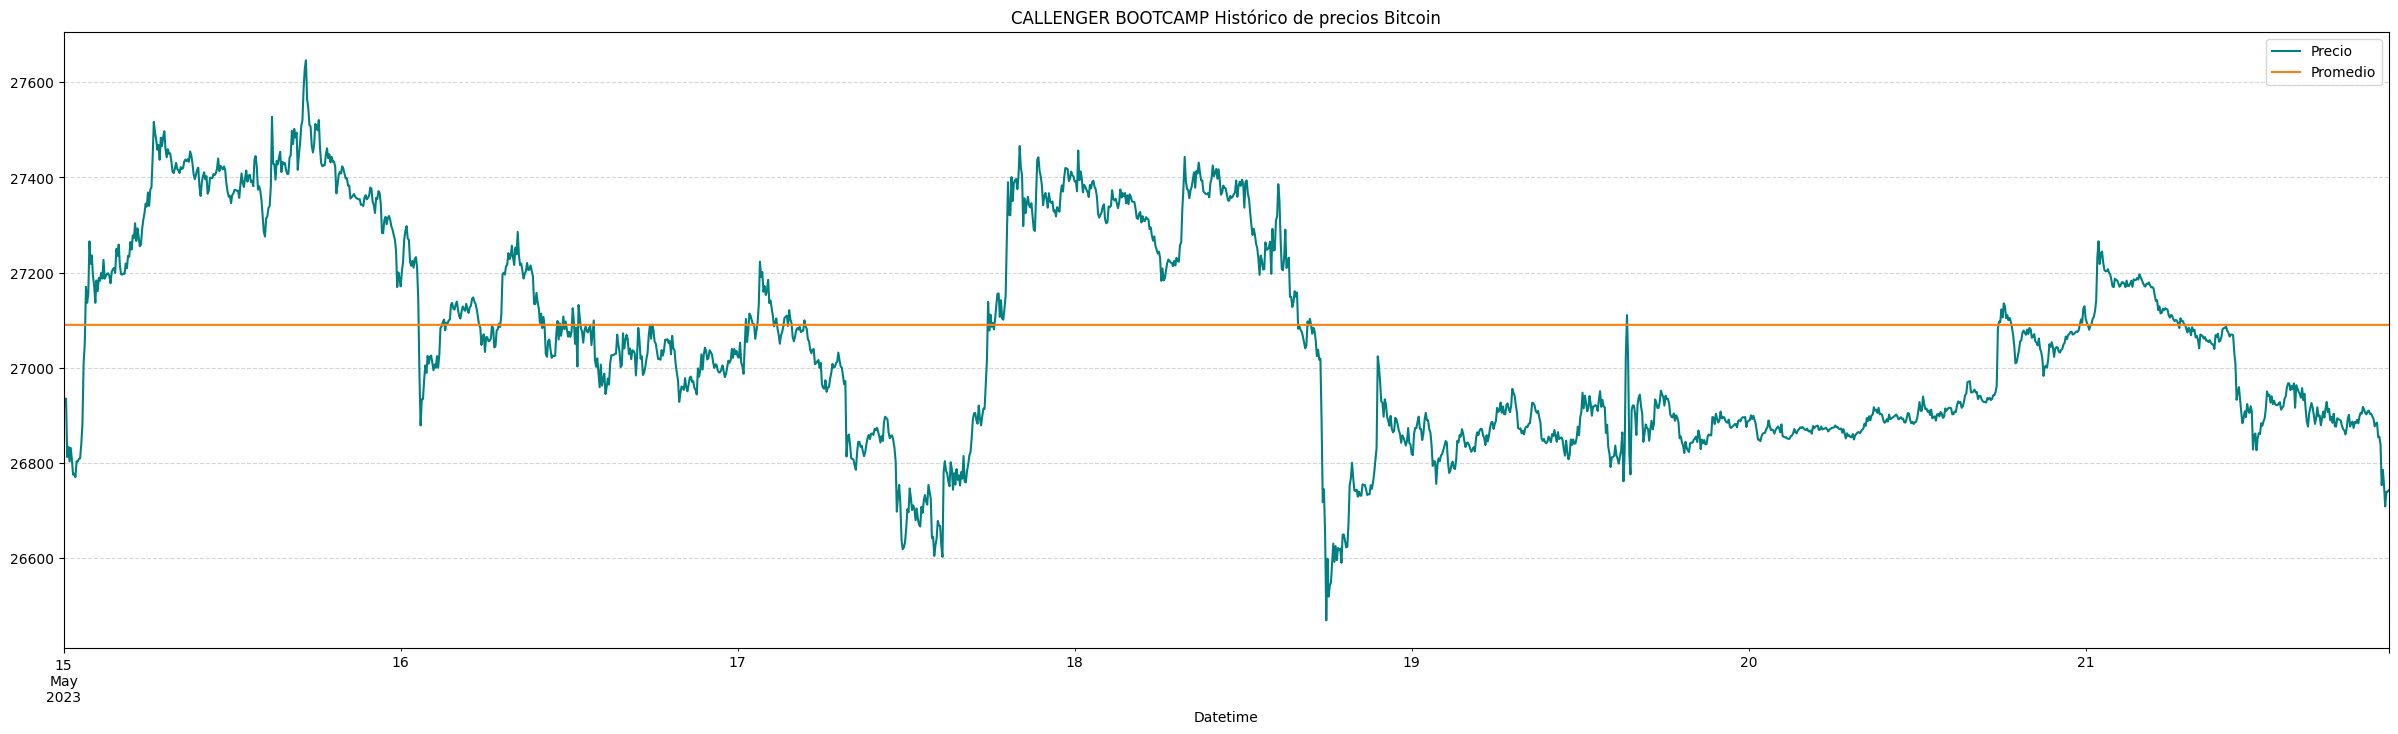

In [193]:
visualizacion()

### **6.0 Automatización**

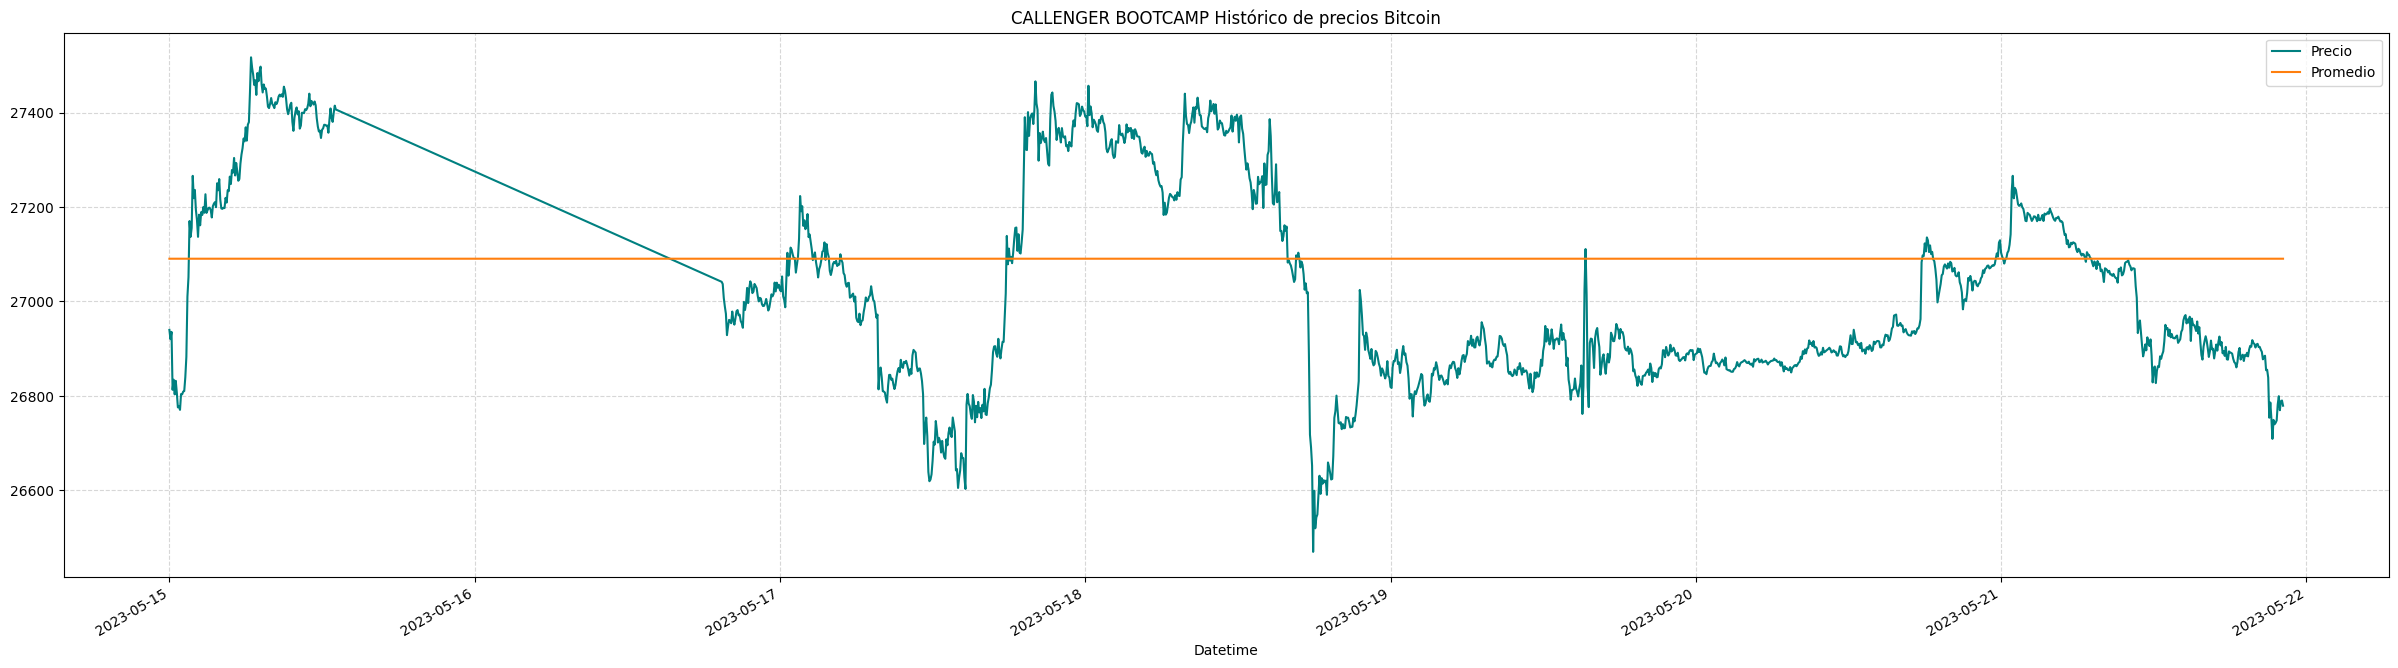

KeyboardInterrupt: ignored

In [197]:
from IPython.display import clear_output
import time

while True:
    clear_output()
    importar_base_bitcoin()
    extraer_tendencias()
    limpieza_datos()
    tomar_decisiones()
    visualizacion()
    time.sleep(300)